In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<!-- BEGIN QUESTION -->



In [3]:
from sklearn.compose import (
    ColumnTransformer,
    TransformedTargetRegressor,
    make_column_transformer,
)
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

The dataset is about each Airbnb listings in New York City with 16 columns in total. There are 5 integer columns and 5 string columns also some other column types such as date and boolean. I think in order to predict reviews_per_month, its better to exclude the number of reviews and last review because from first glance they are very correlated to the response variable

In [4]:
nyc_df = pd.read_csv("AB_NYC_2019.csv")

In [5]:
nyc_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [6]:

train_df, test_df = train_test_split(nyc_df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [7]:
#Use describe to see numerical columns
train_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27236.000000,34226.000000,34226.000000
mean,1.893979e+07,6.726273e+07,40.729142,-73.952083,151.528399,7.094957,23.244814,1.369816,7.042453,112.526004
std,1.101332e+07,7.840511e+07,0.054531,0.046201,236.628392,21.548290,44.573323,1.700737,32.590803,131.420031
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.394482e+06,7.721897e+06,40.690193,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.954546e+07,3.074526e+07,40.723240,-73.955550,106.000000,3.000000,5.000000,0.710000,1.000000,45.000000
75%,2.915085e+07,1.068375e+08,40.763287,-73.936270,175.000000,5.000000,23.000000,2.000000,2.000000,225.750000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#Get the unique values for the categorical columns
categorical_columns = train_df.select_dtypes(include=['object'])
for column in categorical_columns.columns:
    unique_values = categorical_columns[column].unique()
    print(f"Unique values of {column}: {unique_values}")

Unique values of name: ['Cozy 1 Bedroom Apt in Hamilton Heights'
 'Amazing One Bedroom at the Time Square Area/72B'
 'New Spacious Master, Williamsburg' ... 'Sunlit, spacious NY apartment'
 'One room.' 'Cozy Private Room w/ 1 Queen Bed']
Unique values of host_name: ['Tommy' 'Irina' 'Nick' ... 'Rossana' 'K Alexandra' 'Musieka']
Unique values of neighbourhood_group: ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
Unique values of neighbourhood: ['Washington Heights' "Hell's Kitchen" 'Williamsburg' 'Park Slope'
 'Bedford-Stuyvesant' 'Fort Greene' 'Harlem' 'East Flatbush'
 'East Village' 'Jamaica' 'Upper West Side' 'Murray Hill'
 'Financial District' 'Long Island City' 'Clifton' 'Carroll Gardens'
 'Midtown' 'Upper East Side' 'Crown Heights' 'East Elmhurst'
 'Middle Village' 'Vinegar Hill' 'East Harlem' 'Theater District'
 'Ridgewood' 'Morningside Heights' 'Kips Bay' 'Kingsbridge' 'Sunnyside'
 'Maspeth' 'Gowanus' 'Bushwick' 'Tribeca' 'Astoria' 'Chinatown' 'Chelsea'
 'Flushing' 'Re

In [9]:
#Use info to get the general view
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

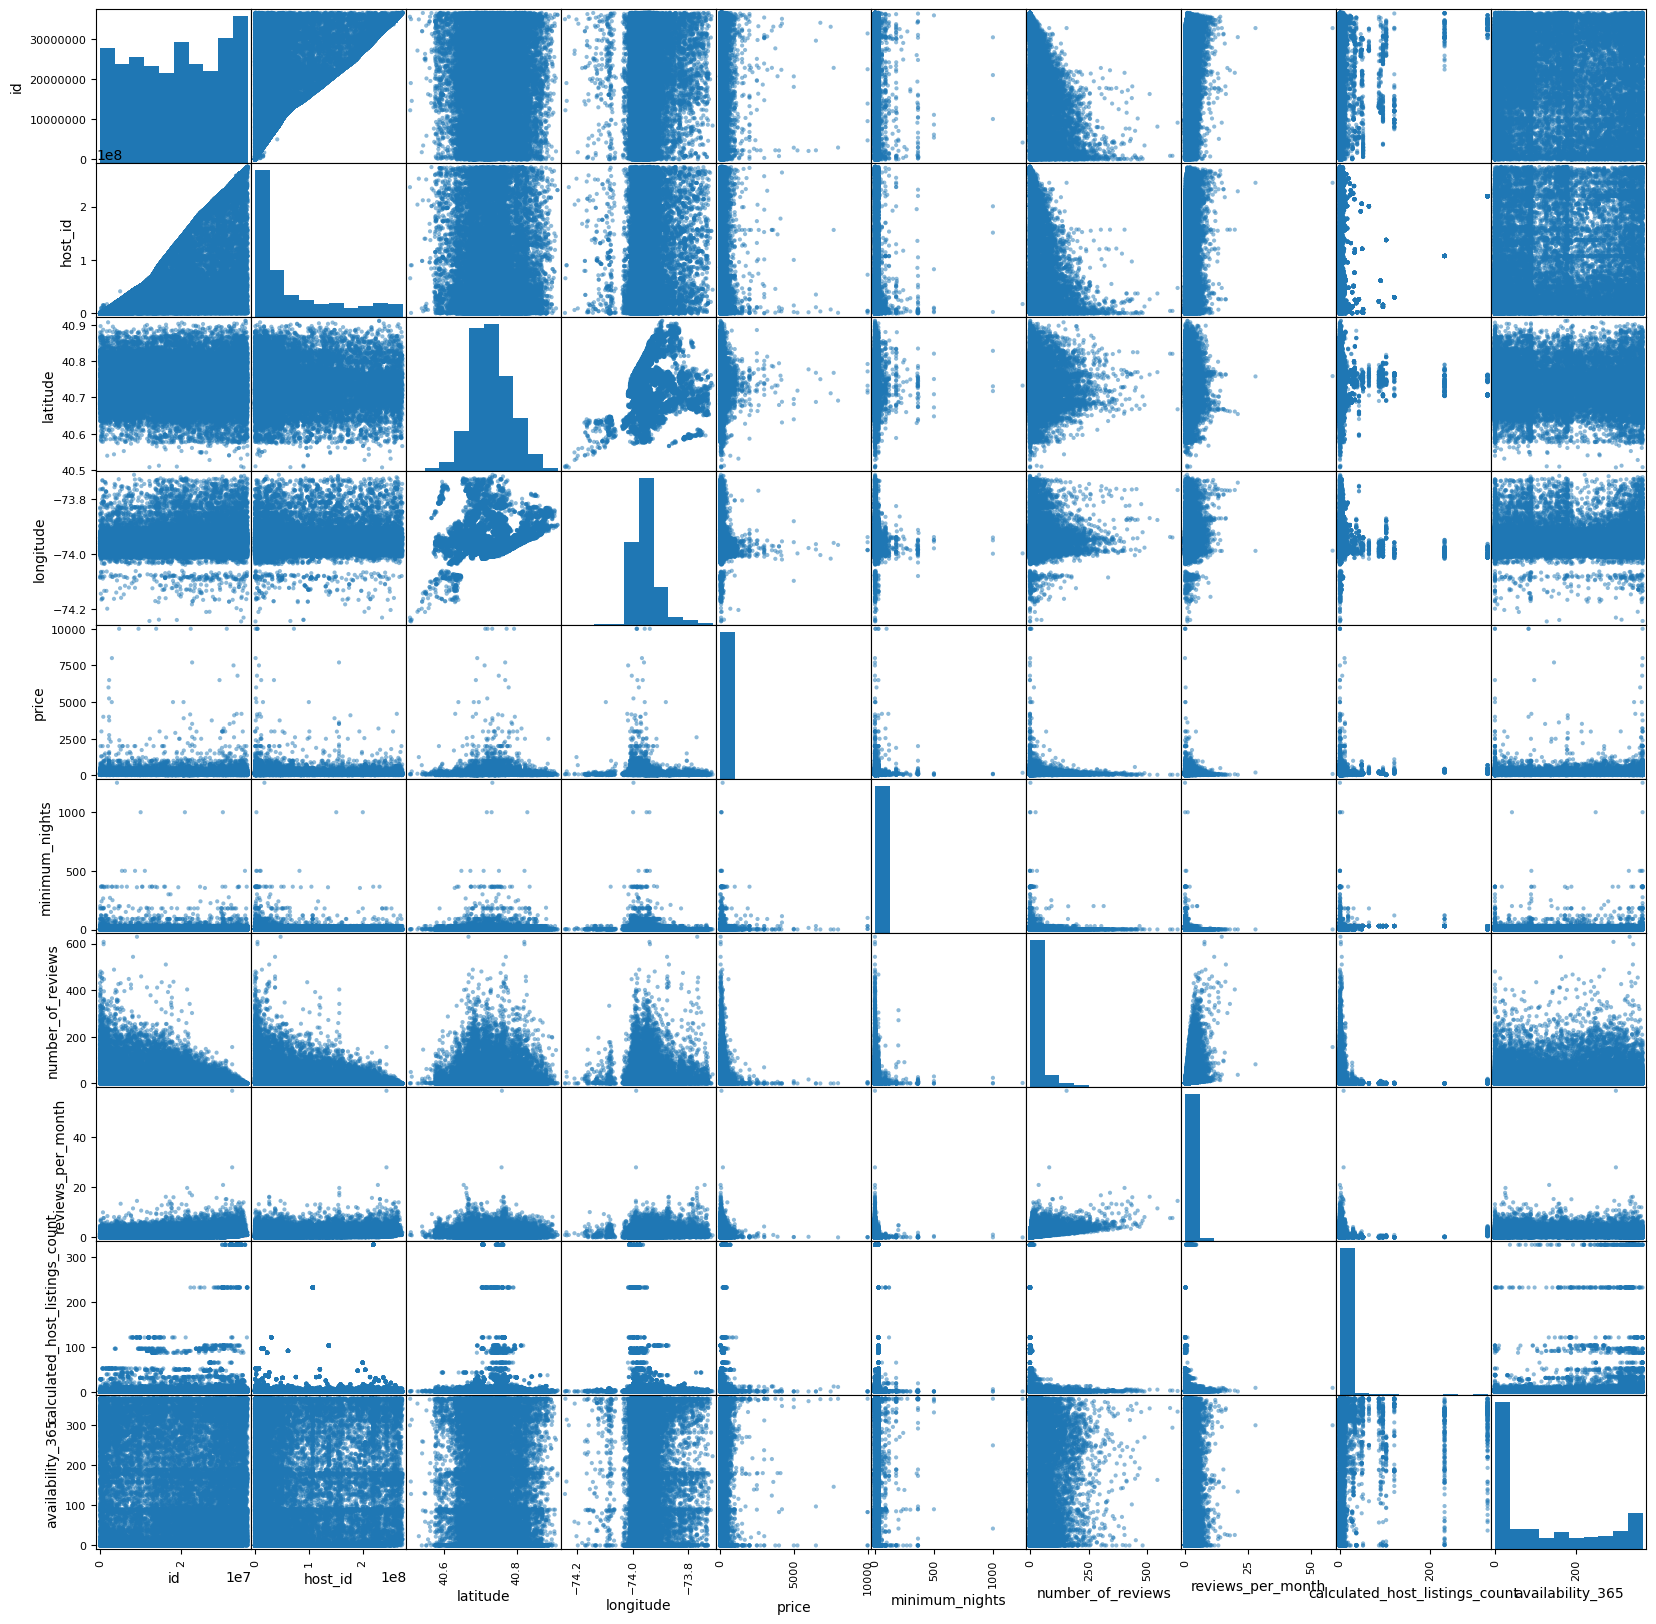

In [10]:
# Create a pair plot using matplotlib and pandas to see the spread and relations between variables
pd.plotting.scatter_matrix(train_df, figsize=(20, 20))
plt.show()

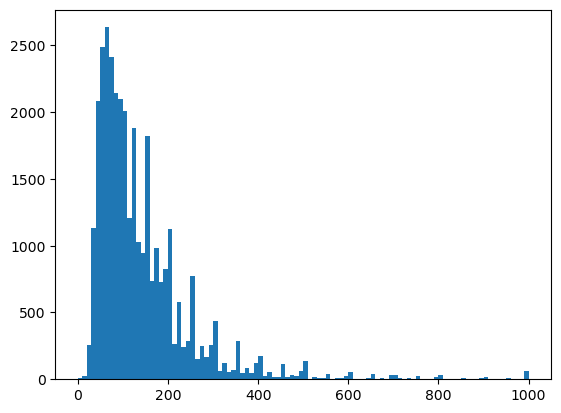

In [11]:
#
plt.hist(train_df['price'],bins = 100,range = (0,1000))
plt.show()

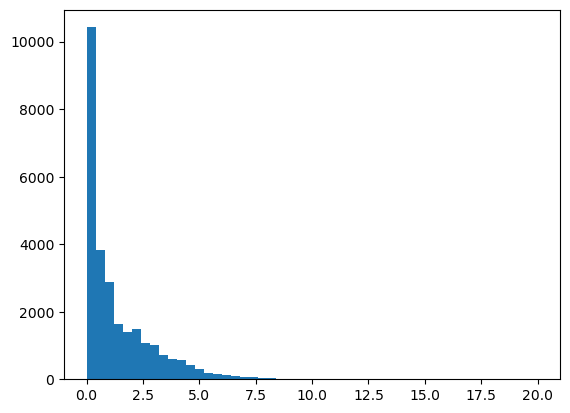

In [12]:
plt.hist(train_df['reviews_per_month'],bins = 50,range = (0,20))
plt.show()

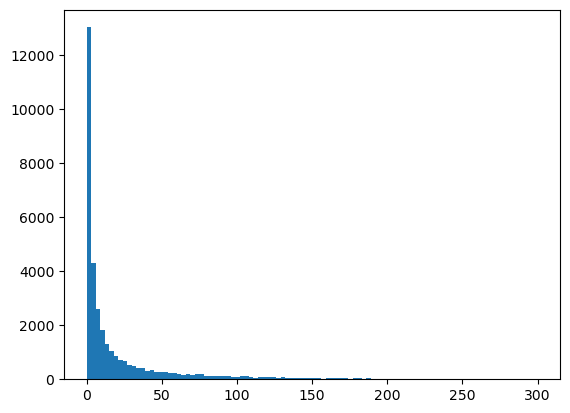

In [13]:
plt.hist(train_df['number_of_reviews'],bins = 100,range = (0,300))
plt.show()

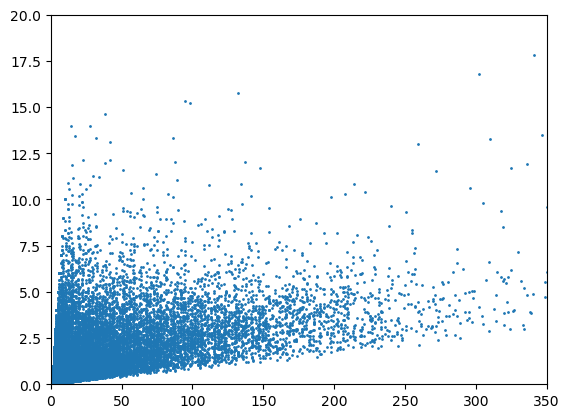

In [14]:
#using Scatter plot to see the relationship between number_of_reviews and reviews_per_month
plt.scatter(train_df['number_of_reviews'], train_df['reviews_per_month'],s =1)
plt.xlim(0,350)
plt.ylim(0,20)
plt.show()

In [15]:
categorical_columns.columns.tolist()

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [16]:
# Get the column names from the DataFrame
columns = train_df.columns.tolist()
columns

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

After visualization I found a large proportion of the numerical features are exponentially distributed. Also based on plots of review per month and total review, it strengthens the statement that we should exclude the review_per_month feature. Lastly,I decided to keepneighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,and availability_365 features. Other features are either categorical with too many unique values or numerical values that has no meaning.

In [17]:
...

Ellipsis

In [18]:
...

Ellipsis

In [19]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

We can get the age of the listing by using the total number reviews divided by the reviews_per_month. This is likely to be relavant to the problem because the age of the house is important for some when renting Airbnb.

In [20]:
train_df['listing_months'] = train_df['number_of_reviews'] / train_df['reviews_per_month']
test_df['listing_months'] = test_df['number_of_reviews'] / test_df['reviews_per_month']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

Since the reviews_per_month column only has 27236 non-null objects, we need to first drop the rows with null reviews_per_month.

For the numerical columns, we need to first impute the missing values using mean and then apply scaling. 

For the categorical columns, we need to first impute the missing values using mean and then apply One Hot Encoding.

The rest of columns are dropped.


In [21]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [22]:
X_train = train_df.drop(columns=['reviews_per_month'])
y_train = train_df['reviews_per_month']

X_test = test_df.drop(columns=['reviews_per_month'])
y_test = test_df['reviews_per_month']

In [23]:
X_train = X_train[~np.isnan(y_train)]

In [24]:
y_train = y_train[~np.isnan(y_train)]

In [25]:
X_test = X_test[~np.isnan(y_test)]

In [26]:
y_test = y_test[~np.isnan(y_test)]

In [27]:
train_df["last_review"]

36150           NaN
45223           NaN
14316           NaN
1691            NaN
20195    2016-12-11
            ...    
7763     2019-06-01
15377    2019-06-30
17730    2019-01-01
28030    2019-06-04
15725    2019-04-29
Name: last_review, Length: 34226, dtype: object

In [28]:

numeric_features = [
    "latitude",
    "longitude",
    "price",
    "minimum_nights",
    "calculated_host_listings_count",
    "availability_365",
    "listing_months",
]

categorical_features = [
    "neighbourhood_group",
    "room_type",
]

ordinal_features = []
binary_features = []  # Not binary in general but in this particular dataset it seems to have only two possible values
drop_features = ["id","name","host_id","host_name","neighbourhood","last_review","number_of_reviews",]
target = "reviews_per_month"

In [29]:
# Get the column names from the DataFrame
columns = train_df.columns.tolist()
columns


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'listing_months']

In [30]:
numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [31]:
dummy = DummyRegressor()

In [32]:
pd.DataFrame(cross_validate(dummy, X_train, y_train, cv=10, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.001974,0.001434,-0.000025,0.0
1,0.001304,0.000216,-0.000159,0.0
2,0.001182,0.000184,-0.000490,0.0
3,0.001130,0.000172,-0.000027,0.0
4,0.001797,0.000273,-0.000070,0.0
5,0.001294,0.000179,-0.000577,0.0
6,0.001233,0.000177,-0.000052,0.0
7,0.001217,0.000194,-0.000022,0.0
8,0.001721,0.000288,-0.000339,0.0
9,0.001756,0.000247,-0.003229,0.0


In [33]:
pipe_dummy = make_pipeline(
    preprocessor, dummy
)

In [34]:
pipe_dummy.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'price', 'minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'availability_365',
                                                   'listing_months']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['neighbourhood_group',
                                                   'room_type']),
                                                 ('drop', 'drop',
                                                  ['id', 'name', 'host_id',
                                                   'host_name', 'neighbourhood',
                                                   'last_review',
                                                   'number_of_reviews'])])),
                ('dummyregressor', DummyRegressor())])

<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

Summary: The model did a very poor job using linear ridge model with training and testing score around 12%. After hyperparameter tuning with RidgeCV, the result still did not improve significantly.

In [35]:
lr = make_pipeline(preprocessor, Ridge())
lr.fit(X_train, y_train);

In [36]:
lr_preds = lr.predict(X_test)
lr_preds[:10]

array([0.44358226, 0.92026904, 0.86093628, 1.63746448, 1.43525367,
       1.80202161, 1.86445072, 0.94401784, 1.04581179, 1.91440771])

In [37]:
lr_preds.max(), lr_preds.min()

(3.540025444484783, -3.2150883112440134)

In [38]:
lr_pipe = make_pipeline(preprocessor, Ridge())
cv_scores  = cross_validate(lr_pipe, X_train, y_train, cv=10, return_train_score=True)

In [39]:
# Convert the cross_validate results to a DataFrame
df_cv_results = pd.DataFrame(cv_scores)

# Calculate and include the standard deviation in the DataFrame
df_cv_results['std_test_score'] = np.std(cv_scores['test_score'])

In [40]:
df_cv_results

,fit_time,score_time,test_score,train_score,std_test_score
0,0.028628,0.003230,0.131286,0.120625,0.009976
1,0.017051,0.003165,0.125622,0.121231,0.009976
2,0.016119,0.002940,0.113036,0.122726,0.009976
3,0.016672,0.002894,0.109890,0.122822,0.009976
4,0.016736,0.002863,0.102993,0.124539,0.009976
5,0.016651,0.002822,0.122434,0.121598,0.009976
6,0.016455,0.002623,0.135510,0.120278,0.009976
7,0.016976,0.002755,0.127924,0.121050,0.009976
8,0.016877,0.002671,0.114460,0.121641,0.009976
9,0.016172,0.002861,0.112358,0.122319,0.009976


### Hyperparameter tuning with RidgeCV

In [41]:
alphas = 10.0 ** np.arange(-6, 6, 1)
ridgecv_pipe = make_pipeline(preprocessor, RidgeCV(alphas=alphas, cv=10))
ridgecv_pipe.fit(X_train, y_train);

In [42]:
best_alpha = ridgecv_pipe.named_steps["ridgecv"].alpha_

best_alpha

100.0

In [43]:
ridge_tuned = make_pipeline(preprocessor, Ridge(alpha=best_alpha))
ridge_tuned.fit(X_train, y_train)
ridge_preds = ridge_tuned.predict(X_test)
ridge_preds[:10]

array([0.4467839 , 0.92665462, 0.86039922, 1.63099755, 1.44000421,
       1.79505806, 1.86123727, 0.94175026, 1.04495458, 1.9143264 ])

In [44]:
cv_scores  = cross_validate(ridge_tuned, X_train, y_train, cv=10, return_train_score=True)

In [45]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,0.026735,0.002917,0.131425,0.120547
1,0.016758,0.003128,0.125417,0.121164
2,0.016398,0.002495,0.112940,0.122658
3,0.016358,0.002573,0.109998,0.122752
4,0.016242,0.002759,0.102715,0.124480
5,0.017122,0.002792,0.122533,0.121523
6,0.015976,0.002620,0.136030,0.120196
7,0.016040,0.002575,0.127803,0.120985
8,0.016357,0.002671,0.114140,0.121590
9,0.015971,0.002655,0.112633,0.122244


In [46]:
new_columns = (
    numeric_features + ordinal_features
)

Summary: The model did a very poor job using linear ridge model with training and testing score around 12%. After hyperparameter tuning with RidgeCV, the result still did not improve significantly.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

I choose decision tree, GradientBoostingRegressor, and LGBM

In [47]:
pipe_dt = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=123))

# Perform cross-validation and obtain the results
cv_results = pd.DataFrame(cross_validate(pipe_dt, X_train, y_train, return_train_score=True, cv=10))

In [48]:
cv_results.mean()

fit_time       0.178470
score_time     0.003916
test_score    -0.093678
train_score    1.000000
dtype: float64

In [49]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

In [50]:
pipe_sklearn_histGB = make_pipeline(preprocessor, HistGradientBoostingRegressor(random_state=123))


In [51]:
cv_results = pd.DataFrame(cross_validate(pipe_sklearn_histGB, X_train, y_train, return_train_score=True, cv=10))

In [52]:
cv_results.mean()

fit_time       1.338608
score_time     0.015178
test_score     0.438511
train_score    0.546944
dtype: float64

In [53]:
pipe_sklearn_GB = make_pipeline(
    preprocessor,
    GradientBoostingRegressor(random_state=123),
)

In [54]:
cv_results = pd.DataFrame(cross_validate(pipe_sklearn_GB, X_train, y_train, return_train_score=True, cv=10))

In [55]:
cv_results.mean()

fit_time       2.905811
score_time     0.006046
test_score     0.382213
train_score    0.403439
dtype: float64

In [56]:
from lightgbm.sklearn import LGBMRegressor

In [57]:
pipe_lgbm = make_pipeline(
    preprocessor, LGBMRegressor(random_state=123, verbose=-1)
)

In [58]:
cv_results = pd.DataFrame(cross_validate(pipe_lgbm, X_train, y_train, return_train_score=True, cv=10))

In [59]:
cv_results.mean()

fit_time       0.383246
score_time     0.006879
test_score     0.447293
train_score    0.558521
dtype: float64

Within the three models I chose, LGBM preformed the best with the highest mean train_score and test_score and second best fit time. There are no significant overfitting/underfitting problem with GradientBoostingRegressor but a little bit for LGBM and HistGradientBoostingRegressor.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [60]:
from sklearn.feature_selection import SelectKBest, f_regression


In [61]:
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features (you can adjust the value)

In [62]:
select_pipe = make_pipeline(
    preprocessor, selector
)

In [63]:
select_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'price', 'minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'availability_365',
                                                   'listing_months']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['neighbourhood_group',
                                                   'room_type']),
                                                 ('drop', 'drop',
                                                  ['id', 'name', 'host_id',
                                                   'host_name', 'neighbourhood',
                                                   'last_review',
                                                   'number_of_reviews'])])),
                ('selectkbest',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x16566cca0>))])

<!-- END QUESTION -->

<br><br>

In [64]:
pd.DataFrame(
    cross_validate(select_pipe, X_train, y_train, scoring='neg_mean_squared_error', return_train_score=True)
).mean()

/Users/lucas007/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lucas007/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/lucas007/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/lucas007/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/lucas007/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

fit_time       0.015588
score_time     0.001357
test_score          NaN
train_score         NaN
dtype: float64

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [65]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### LGBM

In [66]:
param_grid = {
    'max_depth': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
}

In [67]:
pipe_search = make_pipeline(preprocessor,LGBMRegressor())

In [68]:
# Perform grid search
#grid_search = GridSearchCV(pipe_search, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

In [69]:
#random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5)
#random_search.fit(X_train, y_train)

In [70]:
...

Ellipsis

In [71]:
...

Ellipsis

In [72]:
...

Ellipsis

In [73]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [74]:
print(pipe_lgbm.named_steps["columntransformer"].named_transformers_)

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())]), 'pipeline-2': Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), 'drop': 'drop'}


In [75]:
ohe_feature_names = (
    pipe_lgbm.named_steps["columntransformer"]
    .named_transformers_["pipeline-2"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_features)
    .tolist()
)
feature_names = (
    numeric_features + ohe_feature_names
)

In [76]:
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index
)

In [77]:
X_train_enc.head()

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,listing_months,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
20195,-0.275211,0.054428,0.312196,-0.155184,-0.157730,-0.886370,0.249642,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18702,-0.765704,-0.174210,0.452339,-0.103186,-0.157730,0.164338,0.309498,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34780,-0.606211,-0.450669,0.317587,0.052807,-0.081152,0.372934,-0.791399,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
23690,-0.266107,0.157753,0.452339,-0.103186,-0.119441,-0.824563,-0.160621,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
36152,1.516710,-0.006201,0.856598,-0.259180,-0.157730,-0.886370,-0.831959,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [78]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.shape

(11607, 15)

In [79]:
!pip install shap

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://pypi.tuna.tsinghua.edu.cn/simple


In [80]:
import shap

# Create a shap explainer object 
pipe_lgbm.named_steps["lgbmregressor"].fit(X_train_enc, y_train)
lgbm_explainer = shap.TreeExplainer(pipe_lgbm.named_steps["lgbmregressor"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

In [81]:
train_lgbm_shap_values

array([[-0.01466205, -0.02265583, -0.07889317, ...,  0.05984462,
        -0.00296926,  0.00350491],
       [ 0.00732056, -0.03656389, -0.12795615, ...,  0.08498616,
        -0.00566016,  0.00558898],
       [-0.00569996, -0.02885722, -0.17034011, ...,  0.06319445,
        -0.00328504,  0.00638678],
       ...,
       [ 0.02543268, -0.02119293, -0.12180831, ...,  0.04099918,
        -0.00330653,  0.00365994],
       [-0.26457309, -0.00441211,  0.07884505, ..., -0.10390741,
         0.01011757,  0.00979348],
       [ 0.03592294, -0.0320494 ,  0.09962262, ..., -0.03091179,
         0.00873819,  0.00491786]])

In [82]:
test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)
test_lgbm_shap_values[1].shape

(15,)

SHAP Plots

In [83]:
# load JS visualization code to notebook
shap.initjs()

In [84]:
pd.DataFrame(
    test_lgbm_shap_values[1],
    index=feature_names,
    columns=["SHAP values"],
)

,SHAP values
latitude,-0.047191
longitude,-0.033784
price,0.048283
minimum_nights,-0.249909
calculated_host_listings_count,-0.029894
availability_365,-0.625682
listing_months,-0.132348
neighbourhood_group_Bronx,0.000000
neighbourhood_group_Brooklyn,-0.006889
neighbourhood_group_Manhattan,-0.004157


Of all the features, avaliability_365 provided the most significant SHAP value, followed by minimum_nights and listing_months, the other features are less important to the model.

In [85]:
...

Ellipsis

In [86]:
...

Ellipsis

In [87]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

1. LGBM, test_scores = 0.4393
2. Yes. There are no optimization bias
3. Shown below

In [88]:
best_model = LGBMRegressor(random_state=123)

best_pipe = make_pipeline(
    preprocessor, best_model
)

In [89]:
best_pipe.fit(X_train,y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1390
[LightGBM] [Info] Number of data points in the train set: 27236, number of used features: 15
[LightGBM] [Info] Start training from score 1.369816


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'price', 'minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'availability_365',
                                                   'listing_months']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['neighbourhood_group',
                                                   'room_type']),
                                                 ('drop', 'drop',
                                                  ['id', 'name', 'host_id',
                                                   'host_name', 'neighbourhood',
                                                   'last_review',
                                                   'number_of_reviews'])])),
                ('lgbmregressor', LGBMRegressor(random_state=123))])

In [90]:
X_test_processed = pd.DataFrame(preprocessor.transform(X_test))

In [91]:
best_model.score(X_test_processed, y_test)

0.43934803090757946

In [92]:
y_pred_test = best_pipe.predict(X_test)

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [94]:
mse_test

1.4928920246948396

In [95]:
r2_test

0.43934803090757946

In [96]:
explainer = shap.Explainer(best_model)

In [97]:
selected_samples = X_test_enc.iloc[[0, 1]]  

In [98]:
selected_samples

,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,listing_months,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
2964,0.350013,-0.584094,-0.302276,-0.259180,-0.15773,-0.770483,1.883250,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14184,-1.579005,-0.326849,-0.463980,-0.051188,-0.15773,-0.886370,0.337124,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
shap_values = explainer.shap_values(selected_samples)

In [100]:
shap.force_plot(explainer.expected_value, shap_values, selected_samples)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [101]:
column_names = ['Model', 'Fit time', 'Score Time', "Training Score","Testing score"]
values = ['LGBM', '0.364171', '0.006556', "0.558","0.439"]

header_row = ' | '.join(column_names)

value_row = ' | '.join(values)

table = f'{header_row}\n{value_row}'


print(table)

Model | Fit time | Score Time | Training Score | Testing score
LGBM | 0.364171 | 0.006556 | 0.558 | 0.439


Concluding Remarks:
Based on our analysis, we evaluated four different models for the task at hand. The LGBM model performed the best, achieving a test score of 0.43934803090757946. It outperformed the other models, including GradiantBoostingRegressor, DecisionTree, and Ridge, in terms of test scores.

The LGBM model demonstrates strong generalization ability, as the test score is consistent with the training score. This indicates that the model performs well on unseen data, which boosts our confidence in its reliability.

While the LGBM model provided the best results, we acknowledge that there are other potential approaches worth exploring to further improve performance and interoperability.

These approach include hyperparameter optimization or selecting more models to compare their performance.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

I think the most important factors of having a successful model are all before training. It includes preprocessing the data(also feature selection and engineering), choosing which models to use, what evaluation metric to use and tuning the hyperparameters. These steps should be done in a cycle until we find the best model.

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)